In [1]:
import gdown
from hydra import compose, initialize

import torch 
from gsbm.pl_model import GSBMLitModule
from gsbm.dataset import get_dist_boundary
from gsbm.plotting import show_image

In [ ]:
gdown.download(
    id="1YSsRbe7Y68CXxHy6xTWpiKYKJwamV4NR",
    output="data/vae.ckpt",
)
gdown.download(
    id="1woziBuRPFnfnuDtBrAdI1AOjNhbu_E8i",
    output="data/afhq.ckpt",
)

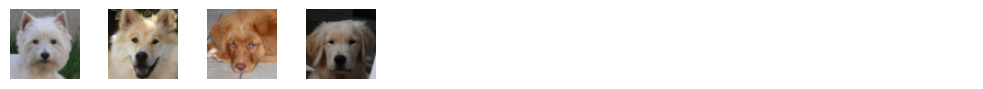

In [2]:
device = "cuda"
with initialize(version_base=None, config_path="../configs"):
    cfg = compose(config_name="train", overrides=["experiment=afhq"])\

## Build examples (Fig 5)
p0, p1, p0_val, p1_val = get_dist_boundary(cfg)
batch_idx = [4365, 1479, 2114, 446]
image = torch.stack([p1.dataset[i] for i in batch_idx], dim=0)
show_image(image)

In [ ]:
## Load model
ckpt = torch.load("data/afhq.ckpt", map_location="cpu")
model = GSBMLitModule(cfg, p0, p1, p0_val, p1_val)
model.load_state_dict(ckpt["state_dict"])
model.to(device)
model.eval()

In [4]:
## Sample
xinit = image.reshape(len(batch_idx), -1).to(device)
output = model.sample(xinit, log_steps=5, direction="bwd", nfe=1000, verbose=True)
xs = output["xs"].detach().cpu()

100%|██████████| 1000/1000 [02:30<00:00,  6.64it/s]


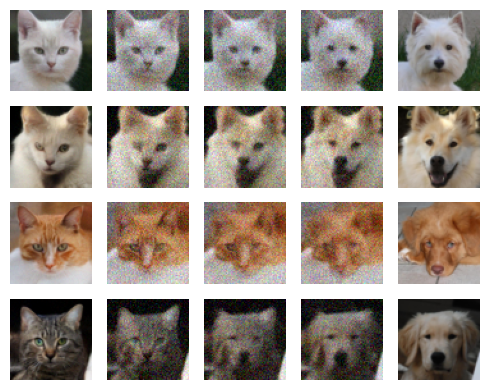

In [5]:
show_image(output["xs"].reshape(-1, 3, 64, 64), ncol=5)